In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('student_exam_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   study_hours      500 non-null    float64
 1   prev_exam_score  500 non-null    float64
 2   pass_exam        500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [3]:
#---check for null values---
print("Nulls")
print("=====")
print(df.isnull().sum())

Nulls
=====
study_hours        0
prev_exam_score    0
pass_exam          0
dtype: int64


In [7]:
corr = df.corr()
print(corr)

                 study_hours  prev_exam_score  pass_exam
study_hours         1.000000         0.010354   0.583505
prev_exam_score     0.010354         1.000000   0.443706
pass_exam           0.583505         0.443706   1.000000


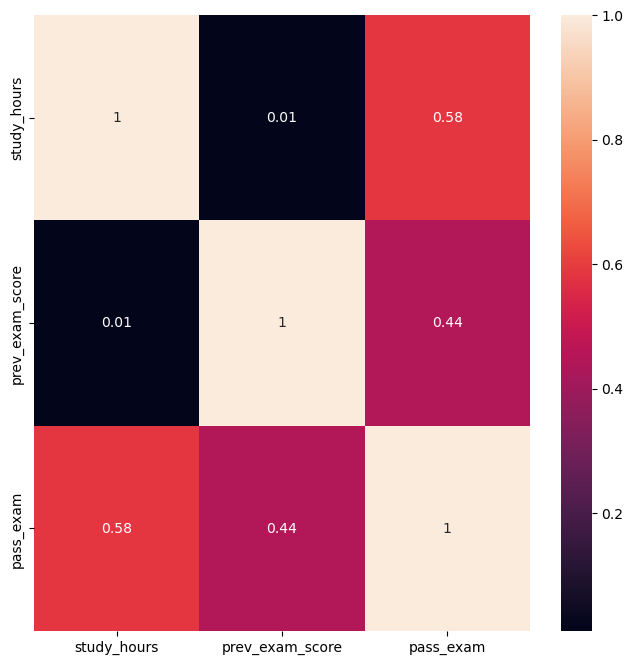

In [11]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(),annot=True)
#---get a reference to the current figure and set its size---
fig = plt.gcf()
fig.set_size_inches(8,8)

In [33]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
#---features---
X = df[['study_hours','prev_exam_score']]
#---label---
y = df.iloc[:,2]
log_regress = linear_model.LogisticRegression()
log_regress_score = cross_val_score(log_regress, X, y, cv=10,
scoring='accuracy').mean()
print(log_regress_score)
result = []
result.append(log_regress_score)

0.8639999999999999


In [35]:
from sklearn.neighbors import KNeighborsClassifier
#---empty list that will hold cv (cross-validates) scores---
cv_scores = []
#---number of folds---
folds = 10
#---creating odd list of K for KNN---
ks = list(range(1,int(len(X) * ((folds - 1)/folds)), 2))
#---perform k-fold cross validation---
for k in ks:
 knn = KNeighborsClassifier(n_neighbors=k)
 score = cross_val_score(knn, X, y, cv=folds, scoring='accuracy').mean()
 cv_scores.append(score)
#---get the maximum score---
knn_score = max(cv_scores)
#---find the optimal k that gives the highest score---
optimal_k = ks[cv_scores.index(knn_score)]
print(f"The optimal number of neighbors is {optimal_k}")
print(knn_score)
result.append(knn_score)

The optimal number of neighbors is 1
0.984


In [37]:
from sklearn import svm
linear_svm = svm.SVC(kernel='linear')
linear_svm_score = cross_val_score(linear_svm, X, y,
 cv=10, scoring='accuracy').mean()
print(linear_svm_score)
result.append(linear_svm_score)

0.866


In [39]:
rbf = svm.SVC(kernel='rbf')
rbf_score = cross_val_score(rbf, X, y, cv=10, scoring='accuracy').mean()
print(rbf_score)
result.append(rbf_score)

0.932


In [41]:
algorithms = ["Logistic Regression", "K Nearest Neighbors", "SVM LinearKernel", "SVM RBF Kernel"]
cv_mean = pd.DataFrame(result,index = algorithms)
cv_mean.columns=["Accuracy"]
cv_mean.sort_values(by="Accuracy",ascending=False)


,Accuracy
K Nearest Neighbors,0.984
SVM RBF Kernel,0.932
SVM LinearKernel,0.866
Logistic Regression,0.864


In [43]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [55]:
import pickle
#---save the model to disk---
filename = 'exam_result_prediction_model.sav'
#---write to the file using write and binary mode---
pickle.dump(model, open(filename, 'wb'))

In [57]:
#---load the model from disk---
loaded_model = pickle.load(open(filename, 'rb'))

In [81]:
study_hours = 5
prev_exam_score = 75
prediction = loaded_model.predict([[study_hours, prev_exam_score]])
print(prediction)
if (prediction[0]==0):
 print("This student will fail the exam!")
else:
 print("This student will pass the exam!")

[1]
This student will pass the exam!


D:\Anaconda\Application\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [83]:
proba = loaded_model.predict_proba([[study_hours, prev_exam_score]])
print(proba)
print("Confidence: " + str(round(np.amax(proba[0]) * 100 ,2)) + "%")

[[0. 1.]]
Confidence: 100.0%


D:\Anaconda\Application\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
